In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('../')

In [3]:
import pandas as pd
sythetic_qa = pd.read_csv('../data/20240801-092254testset.csv')

In [4]:
sythetic_qa.head()

,question,contexts,ground_truth,evolution_type,metadata,episode_done
0,What is the purpose and impact of Nigeria's fr...,"['Lagos, Nigeria (CNN)It\'s a unique world whe...",The purpose of Nigeria's free readers associat...,simple,[{'id': '17826cf095dd6517a4c8b7baf46ed2cbc5522...,True
1,What role did Ronda Rousey play in Wrestlemani...,"['(CNN)Dwayne ""The Rock"" Johnson had a way bet...",Ronda Rousey teamed up with Dwayne 'The Rock' ...,simple,[{'id': 'f434c1ec5d1a67a3bb2df0460a2a2f488e125...,True
2,What was the target and casualty count of the ...,"['Mogadishu, Somalia (CNN)Islamic militants wi...","The attack in Baidoa, Somalia targeted the gov...",reasoning,[{'id': '13ab781de6cc935158714597e74cac5fc8e36...,True
3,What led to Arnold Palmer's shoulder dislocati...,['(CNN)He may be suffering from the effects of...,Arnold Palmer's shoulder dislocation during th...,reasoning,[{'id': '149faf0f84414ada3206851365fe82e1947b7...,True
4,What are the latest census findings on the tig...,"['(CNN)""The Law of the Jungle, which never ord...","The latest tiger census counted 2,226 big cats...",reasoning,[{'id': 'ec1c094bf1f0511520fa9e95149d2edca31f0...,True


In [5]:
# make pandas data view more readable
pd.set_option('display.max_colwidth', None)

In [6]:
# reset pandas display options
pd.set_option('display.max_colwidth', 50)

In [7]:
sythetic_qa.drop('contexts', axis=1, inplace=True)
sythetic_qa.head(10)

,question,ground_truth,evolution_type,metadata,episode_done
0,What is the purpose and impact of Nigeria's fr...,The purpose of Nigeria's free readers associat...,simple,[{'id': '17826cf095dd6517a4c8b7baf46ed2cbc5522...,True
1,What role did Ronda Rousey play in Wrestlemani...,Ronda Rousey teamed up with Dwayne 'The Rock' ...,simple,[{'id': 'f434c1ec5d1a67a3bb2df0460a2a2f488e125...,True
2,What was the target and casualty count of the ...,"The attack in Baidoa, Somalia targeted the gov...",reasoning,[{'id': '13ab781de6cc935158714597e74cac5fc8e36...,True
3,What led to Arnold Palmer's shoulder dislocati...,Arnold Palmer's shoulder dislocation during th...,reasoning,[{'id': '149faf0f84414ada3206851365fe82e1947b7...,True
4,What are the latest census findings on the tig...,"The latest tiger census counted 2,226 big cats...",reasoning,[{'id': 'ec1c094bf1f0511520fa9e95149d2edca31f0...,True
5,What is the term for the time it takes Iran to...,The term for the time it takes Iran to produce...,reasoning,[{'id': '5a7e729e9e69ca44f74cadc9f3ff2169f126f...,True
6,"What does ""Gift Horse"" by Hans Haacke say abou...",'Gift Horse' by Hans Haacke is a comment on th...,multi_context,[{'id': 'bf021e9986c394b2285a4b3481850018966fa...,True
7,What was Simone Gbagbo's role in the crimes ag...,Simone Gbagbo was convicted for her role in ca...,multi_context,[{'id': 'b27cfe53f31128646368411a53a2afc41f405...,True


In [8]:
sythetic_qa.head(10)

,question,ground_truth,evolution_type,metadata,episode_done
0,What is the purpose and impact of Nigeria's fr...,The purpose of Nigeria's free readers associat...,simple,[{'id': '17826cf095dd6517a4c8b7baf46ed2cbc5522...,True
1,What role did Ronda Rousey play in Wrestlemani...,Ronda Rousey teamed up with Dwayne 'The Rock' ...,simple,[{'id': 'f434c1ec5d1a67a3bb2df0460a2a2f488e125...,True
2,What was the target and casualty count of the ...,"The attack in Baidoa, Somalia targeted the gov...",reasoning,[{'id': '13ab781de6cc935158714597e74cac5fc8e36...,True
3,What led to Arnold Palmer's shoulder dislocati...,Arnold Palmer's shoulder dislocation during th...,reasoning,[{'id': '149faf0f84414ada3206851365fe82e1947b7...,True
4,What are the latest census findings on the tig...,"The latest tiger census counted 2,226 big cats...",reasoning,[{'id': 'ec1c094bf1f0511520fa9e95149d2edca31f0...,True
5,What is the term for the time it takes Iran to...,The term for the time it takes Iran to produce...,reasoning,[{'id': '5a7e729e9e69ca44f74cadc9f3ff2169f126f...,True
6,"What does ""Gift Horse"" by Hans Haacke say abou...",'Gift Horse' by Hans Haacke is a comment on th...,multi_context,[{'id': 'bf021e9986c394b2285a4b3481850018966fa...,True
7,What was Simone Gbagbo's role in the crimes ag...,Simone Gbagbo was convicted for her role in ca...,multi_context,[{'id': 'b27cfe53f31128646368411a53a2afc41f405...,True


In [9]:
from scripts.ragas_evaluation import RagasEvaluation
from scripts.generate_test_name import get_test_name

In [10]:
test_name = get_test_name()
test_name = test_name.replace('-', '')
print(test_name)

gpt35turbo_hybrid_recursive_900_50_hyde


In [11]:
gpt35turbo_qdrant_dense_recursive_900_50_no_translation = RagasEvaluation(
    test_name,
    number_of_questions=6)

Evaluating:   0%|          | 0/9 [00:00<?, ?it/s]

In [14]:
gpt35turbo_qdrant_dense_recursive_900_50_no_translation.result_df.head()

,question,answer,contexts,ground_truth,context_recall,faithfulness,answer_correctness,evolution_type
0,What is the term for the time it takes Iran to...,The term for the time it takes Iran to produce...,"[can do what they want."" Diplomats said Iran h...",The term for the time it takes Iran to produce...,1.0,1.000000,0.848981,reasoning
1,"What does ""Gift Horse"" by Hans Haacke say abou...","""Gift Horse"" by Hans Haacke explores the relat...",[Haacke has frequently explored the interconne...,'Gift Horse' by Hans Haacke is a comment on th...,1.0,0.833333,0.619863,multi_context
2,What was Simone Gbagbo's role in the crimes ag...,Simone Gbagbo was convicted for her role in ca...,[(CNN)A court in Ivory Coast has sentenced for...,Simone Gbagbo was convicted for her role in ca...,1.0,1.000000,0.675346,multi_context


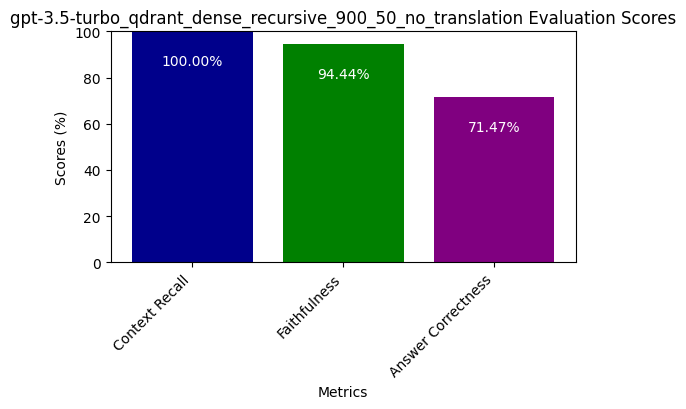

In [15]:
gpt35turbo_qdrant_dense_recursive_900_50_no_translation.plot_evaluation()

In [11]:
gpt35turbo_hybrid_recursive_900_50_no_translation = RagasEvaluation(
    test_name,
    number_of_questions=6)

Evaluating:   0%|          | 0/18 [00:00<?, ?it/s]

In [22]:
gpt35turbo_hybrid_recursive_900_50_no_translation.result_df.head(10)

,question,answer,contexts,ground_truth,context_recall,faithfulness,answer_correctness,evolution_type
0,What is the purpose and impact of Nigeria's fr...,The purpose of Nigeria's free readers associat...,"[Lagos, Nigeria (CNN)It's a unique world where...",The purpose of Nigeria's free readers associat...,1.0,0.80,0.745490,simple
1,What role did Ronda Rousey play in Wrestlemani...,"Ronda Rousey teamed up with Dwayne ""The Rock"" ...","[(CNN)Dwayne ""The Rock"" Johnson had a way bett...",Ronda Rousey teamed up with Dwayne 'The Rock' ...,1.0,0.00,0.999918,simple
2,What was the target and casualty count of the ...,"The target of the attack in Baidoa, Somalia wa...","[initial assault, Abdi said. Al-Shabaab claime...","The attack in Baidoa, Somalia targeted the gov...",0.0,1.00,0.227924,reasoning
3,What led to Arnold Palmer's shoulder dislocati...,Arnold Palmer's shoulder dislocation was cause...,[(CNN)He may be suffering from the effects of ...,Arnold Palmer's shoulder dislocation during th...,1.0,1.00,0.238042,reasoning
4,What are the latest census findings on the tig...,"The latest tiger census in India counted 2,226...",[farmer that the cat that ate his cow is more ...,"The latest tiger census counted 2,226 big cats...",0.5,0.75,0.791965,reasoning
5,What is the term for the time it takes Iran to...,The term for the time it takes Iran to produce...,[as the other side's intransigence in the talk...,The term for the time it takes Iran to produce...,1.0,1.00,0.849187,reasoning


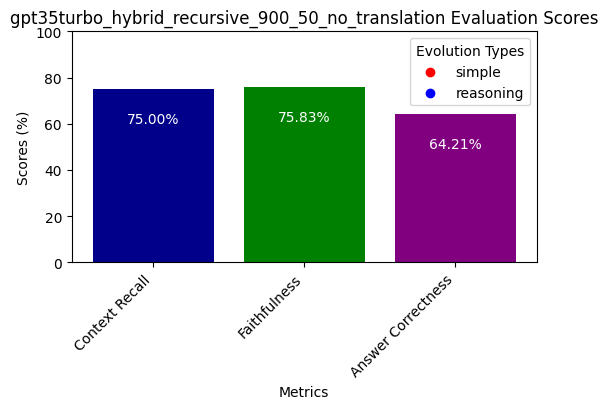

In [13]:
gpt35turbo_hybrid_recursive_900_50_no_translation.plot_evaluation()

In [15]:
gpt35turbo_hybrid_recursive_900_50_no_translation.result_df['question'][2]

'What was the target and casualty count of the attack in Baidoa, Somalia?'

In [16]:
gpt35turbo_hybrid_recursive_900_50_no_translation.result_df['answer'][2]

'The target of the attack in Baidoa, Somalia was Ethiopian soldiers, and seven of them were killed.'

In [17]:
gpt35turbo_hybrid_recursive_900_50_no_translation.result_df['ground_truth'][2]

'The attack in Baidoa, Somalia targeted the government administration offices. The casualty count was nine people, including four attackers, killed.'

In [21]:
gpt35turbo_hybrid_recursive_900_50_no_translation.result_df['contexts'][2]

array(['initial assault, Abdi said. Al-Shabaab claimed responsibility for the attack. A broadcast by the group\'s official radio station, Andulus, said that Al-Shabaab gunmen had entered the regional president\'s house and killed seven Ethiopian soldiers. The African Union\'s special representative for Somalia, Ambassador Maman S. Sidikou, condemned the attack, saying it had targeted troops who have worked to restore peace to Baidoa. "I am deeply saddened by news of the attack in Baidoa this morning," he said in a statement released by AMISOM, the African Union mission to Somalia. Sidikou said he had also received reports of an attempted attack at a Mogadishu hotel Wednesday night. "These are desperate attempts by Al-Shabaab to seek relevance, following the massive defeats they continue to suffer from the Somali National Army working together with AMISOM troops," he said. Al-Shabaab started with a\n\ninitial assault, Abdi said. Al-Shabaab claimed responsibility for the attack. A broadc

In [11]:
gpt35turbo_hybrid_recursive_900_50_hyde = RagasEvaluation(
    test_name,
    number_of_questions=6)

Evaluating:   0%|          | 0/18 [00:00<?, ?it/s]

In [12]:
gpt35turbo_hybrid_recursive_900_50_hyde.result_df.head(10)

,question,answer,contexts,ground_truth,context_recall,faithfulness,answer_correctness,evolution_type
0,What is the purpose and impact of Nigeria's fr...,The purpose of Nigeria's free readers associat...,"[Lagos, Nigeria (CNN)It's a unique world where...",The purpose of Nigeria's free readers associat...,1.0,1.000000,0.704619,simple
1,What role did Ronda Rousey play in Wrestlemani...,Ronda Rousey made a surprise appearance at Wre...,"[(CNN)Dwayne ""The Rock"" Johnson had a way bett...",Ronda Rousey teamed up with Dwayne 'The Rock' ...,1.0,0.333333,0.841788,simple
2,What was the target and casualty count of the ...,"The target of the attack in Baidoa, Somalia wa...","[Mogadishu, Somalia (CNN)Islamic militants wit...","The attack in Baidoa, Somalia targeted the gov...",1.0,1.000000,0.748348,reasoning
3,What led to Arnold Palmer's shoulder dislocati...,Arnold Palmer's shoulder dislocation during th...,[(CNN)He may be suffering from the effects of ...,Arnold Palmer's shoulder dislocation during th...,1.0,0.500000,1.000000,reasoning
4,What are the latest census findings on the tig...,"The latest tiger census in India counted 2,226...",[farmer that the cat that ate his cow is more ...,"The latest tiger census counted 2,226 big cats...",0.5,1.000000,0.847752,reasoning
5,What is the term for the time it takes Iran to...,The term for the time it takes Iran to produce...,[as the other side's intransigence in the talk...,The term for the time it takes Iran to produce...,1.0,1.000000,0.848949,reasoning


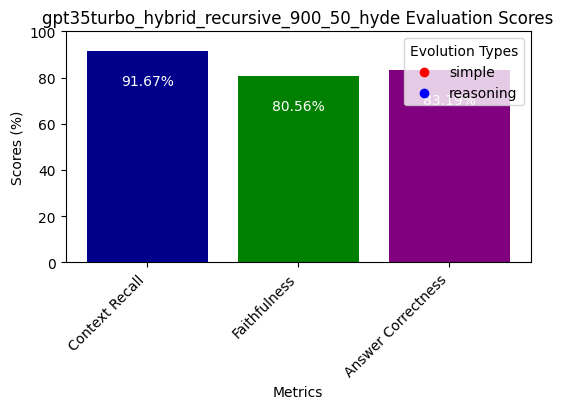

In [13]:
gpt35turbo_hybrid_recursive_900_50_hyde.plot_evaluation()

In [38]:
from matplotlib import pyplot as plt


def plot_evaluation():
    # calculate the average score of context precision per total score
    rows = gpt35turbo_hybrid_recursive_900_50_hyde.result_df.shape[0]

    context_recall_sum = gpt35turbo_hybrid_recursive_900_50_hyde.result_df['context_recall'].sum()
    faithfulness_sum = gpt35turbo_hybrid_recursive_900_50_hyde.result_df['faithfulness'].sum()
    answer_correctness_sum = gpt35turbo_hybrid_recursive_900_50_hyde.result_df['answer_correctness'].sum()

    context_recall_score = context_recall_sum / rows * 100
    faithfulness_score = faithfulness_sum / rows * 100

    answer_correctness_score = answer_correctness_sum / rows * 100

    # Visualization
    labels = ['Context Recall', 'Faithfulness', 'Answer Correctness']
    scores = [context_recall_score, faithfulness_score, answer_correctness_score]

    plt.figure(figsize=(8, 6))
    plt.bar(labels, scores, color=['darkBlue', 'green', 'purple'])
    # tilt the x axis labels to 45 degrees
    plt.xticks(rotation=45, ha='right')
    plt.xlabel('Metrics')
    plt.ylabel('Scores (%)')
    plt.title(f'{gpt35turbo_hybrid_recursive_900_50_hyde.test_name} Evaluation Scores')
    plt.ylim(0, 100)

    # Annotate bars with scores
    for i, score in enumerate(scores):
        plt.text(i, score - 10, f'{score:.2f}%', ha='center', va='top', color='white')

    # Add legend for evolution types
    evolution_types = gpt35turbo_hybrid_recursive_900_50_hyde.result_df['evolution_type'].unique()
    evolution_colors = ['red', 'blue', 'yellow', 'cyan']  # Define colors for each evolution type
    color_map = {evolution: color for evolution, color in zip(evolution_types, evolution_colors)}

    for evolution, color in color_map.items():
        # make the scatter plot not overlay the bar plot
        plt.scatter([], [], color=color, label=evolution)

    plt.legend(title="Evolution Types")

    plt.show()

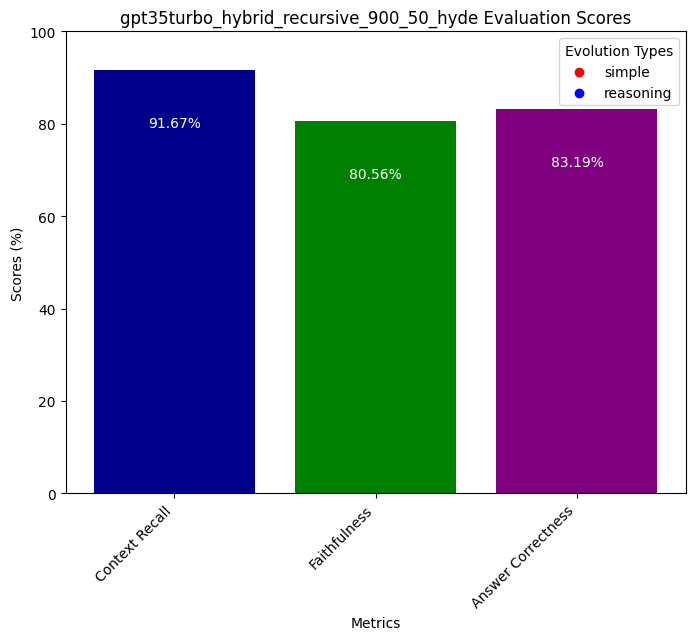

In [39]:
plot_evaluation()